# Semana 3 do Aceleradev DS Codenation

## Professor: Túlio Vieira de Souza | Tema: Amostragens e Distribuições de Probabilidades

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as act
import seaborn as sns

**Variável Aleatória V.A**

Contextualização Didática, __Autor__: Kazuki Yokoyama (kazuki.yokoyama@ufrgs.br):
    
Imaginem o cenário onde queremos fazer uma pesquisa de opinião com 50 pessoas. Se anotarmos `0` para respostas "Não" e `1` para "Sim", nosso espaço amostral (a combinação de todas as respostas) é 2$^{50}$, um número muito grande. Deve haver portanto um jeito de sumarizar essa informação. E há. Como queremos saber apenas, por exemplo, a quantidade de pessoas que responderam "Sim", podemos representar essa informaçao com apenas um único escalar. Podemos definir nossa variável aleatória, 𝑋, como 𝑋 = número de respondentes "Sim". Reparem que os possíveis valores para 𝑋 são {0,1,2,3,…,50}, que é bem menor que 2$^{50}$.

Notação: na literatura, encontramos $X = x$. O $X$ é a *V.A*, e $x$ é o valor possível que *V.A* pode assumir *simbolicamente*, e esses valores podem ser **Discretos ou Contínuos**.

- Discretos: $\Omega = \{x_1, x_2, ..., x_n\}, \Omega \in \mathbb{Z}$
- Contínuos: $\Omega = \{x_1, x_2, ..., x_n\}, \Omega \in \mathbb{R}$

**Função de Distribuição Acumulada (CDF)**

*CDF* é uma **função** que tem os valores do conjunto V.A como variáveis independentes. E ela exprime a **probabilidade** de ocorrencia de **todos** os eventos de V.A até x. Ou seja, nada mais é que uma função acumulada.

$$F(x) = P(X \leq x)$$

Diante disso:
$$F(x) \subset [0, 1]$$
$$x \in \Omega$$

**Função de Probabilidade P(X)**

Como visto, F(x) a retorna a probabilidade de $X \leq x$. Mas ela possui uma função associada, que também retorna a probabilidade $X \leq x$, a P(X).

Como ela trata de probabilidades:
$$P(X \leq x) \geq 0$$
$$P(\Omega) = P(x_1) + P(x_2) + ... + P(x_n) = 1$$

Na segunda proposição, note que a soma das probabilidades não é dada da mesma maneira se V.A é *discreta* ou *contínua*

- Discreta: $F(x) = P(X \leq x) = \sum_{k \leq x} f(k) = \sum_{k \leq x} P(X = k)$, sendo $f(k)$ chamada **função massa de probabilidade**

- Contínua: $P(X \leq x) = F(x) = \int_{-\infty}^x f(t) dt$, sendo $f(t)$ chamada **função densidade de probabilidade**

**Repare:** $f(t)$ não nos dá a probabilidade, ela apenas modela a densidade de probabilidade. Ou seja, a **área** abaixo dessa função que representa a probabilidade. Diante disso, do Cálculo I
$$P(a \leq X \leq b) = F(b) - F(a) = \int_{a}^{b} f(t) dt$$

**Distribuição Normal** X ~ $N(\mu, \sigma^2)$

Também conhecida como *Gaussiana*, é uma distribuiçao **contínua** que caracteriza muitos fenômenos naturais, e é usada desde a física até estatística.

A distribuição Normal possui **DOIS** parâmetros: $\mu$ e $\sigma^2$. E sua função *densidade de probabilidade* é dada por
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-1}{2}(\frac{x - \mu}{\sigma})^2}, -\infty < x < \infty$$

Mas, é comum ver essa *distribuição* **Padronizada**

$$Z = \frac{X - \mu}{\sigma}$$

Com isso, tomando $\mu = 0$ e $\sigma = 1$, a função *densidade de probabilidade* fica

$$f(z) = \frac{1}{\sqrt{2\pi}}e^{\frac{-z^2}{2}}$$

Para entender de distribuições, vamos começar fazendo um gráfico de **Distribuição Normal** *X ~ $N(\mu,\sigma^2)$*
```python
scipy.stats.norm.rvs(loc=int, scale=int, size=int)
```

**Parâmetros:**

- size: tamanho da amostra. São gerados *int* valores aleatórios
- scale: desvio padrão
- loc: média

In [2]:
normal = act.norm.rvs(loc=10, scale=3, size=1000)

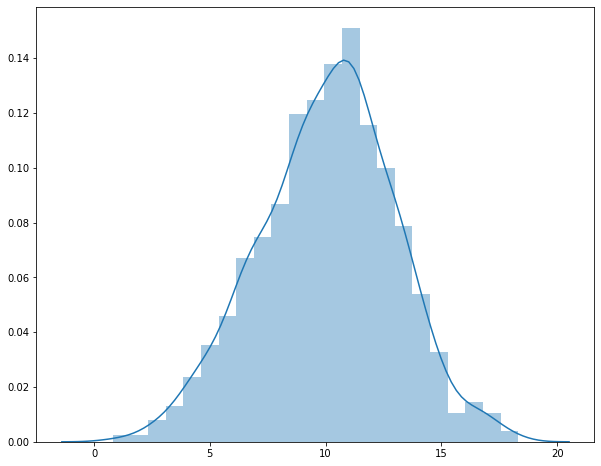

In [3]:
plt.figure(figsize=(10,8))
sns.distplot(normal);

Como são valores aleatórios, as estatísticas do conjunto sempre serão ligeiramente diferentes do *loc* e *scale*

In [4]:
normal.mean(), normal.var(), normal.std()

(10.067474049805776, 8.523614258676535, 2.91952295053088)

Podemos calcular a probabilidade de ocorrer um valor menor igual a *float* $F(float) = P(X \leq float)$ com a *CDF*
```python
scipy.stats.cdf(x=float ou list, loc=int, scale=int)
```

Com a *CDF*, também podemos calcular a probabilidade do evento **complementar** $P(X > float)$ subtraindo 1 da função acima, ou
```python
scipy.stats.sf(x=float ou list, loc=int, scale=int)
```

Se quisermos obter o valor da **função densidade de probabilidade** *f(float)*
```python
scipy.stats.pdf(x=float ou list, loc=int, scale=int)
```

**Parâmetros:**

- x: se int, (-$\infty$, int]. Se list, array([prob1, prob2])
- loc: média
- scale: desvio padrão

Para calcular $F(8) = P(X \leq 8)$ com a *CDF*

In [5]:
act.norm.cdf(x=8, loc=10, scale=3)

0.2524925375469229

Para calcular o evento complementar de P(X $\leq$ 8), o P(X $>$ 8)

In [6]:
1 - act.norm.cdf(x=8, loc=10, scale=3)

0.7475074624530771

In [7]:
act.norm.sf(x=8, loc=10, scale=3)

0.7475074624530771

Para calcular P(4$\leq$X$\leq$5) com a *CDF*

In [8]:
intervalo = act.norm.cdf(x=[4, 5], loc=10, scale=3)
print(intervalo)
a, b = intervalo
print(f'P = {b - a}')

[0.02275013 0.04779035]
P = 0.025040220324635508


**Perceba:** Como previsto, se fizermos $F(\mu) = P(X \leq \mu)$, teremos 50% de chance de X assumir um valor menor ou igual a média, uma vez que a N($\mu, \sigma^2$) é simétrica em torno da média.

In [9]:
act.norm.cdf(x=10, loc=10, scale=3)

0.5

Podemos fazer o gráfico da função *CDF* e percebermos que, de fato, ela é *cumulativa*

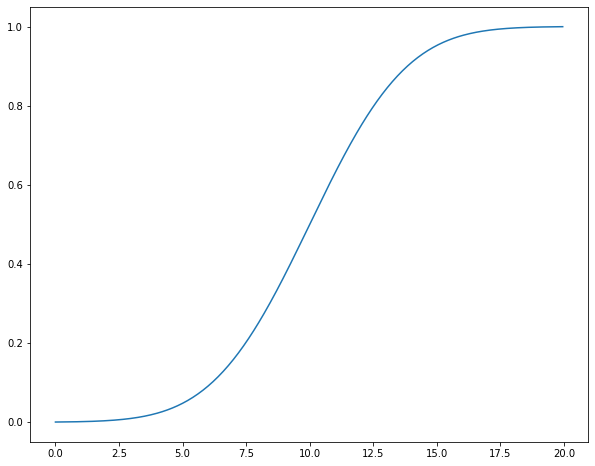

In [10]:
malha = np.arange(0, 20, .05)
cumulativa = act.norm.cdf(malha, loc=10, scale=3)

plt.figure(figsize=(10, 8))
plt.plot(malha, cumulativa)
plt.show()

Pela *CDF*, pudemos obter a **probabilidade acumulada** dada um valor $x_n$ de X. Agora, e se quisermos obter o $x_n$ de *PDF* que gera a probabilidade acumulada? Por exemplo, vimos que $F(8) = P(X \leq 8) = 0.2524925375469229$, como descobrir o "x" de $F(x) = P(X \leq x) = 0.2524925375469229$?
```python
scipy.norm.ppf(x=float, loc=float, scale=float)
```

como *PDF* é simétrica em relação à $\mu$, existem 2 valores de x para *PDF*, sendo essa função acima a que trabalha com o **lado esquerdo** da distribuição de probabilidade. Para o lado **direito**
```python
scipy.norm.isf(x=float, loc=float, scale=float)
```

**Parâmetros:**

- x: se int, (-$\infty$, int]. Se list, array([prob1, prob2])
- loc: média
- scale: desvio padrão

Novamete, $F(8) = P(X \leq 8)$

In [11]:
act.norm.cdf(x=8, loc=10, scale=3)

0.2524925375469229

$F(x) = P(X \leq x) = 0.2524925375469229$ para o lado *esquerdo*

In [12]:
act.norm.ppf(q=0.2524925375469229, loc=10, scale=3)

8.0

$F(x) = P(X \geq x) = 0.2524925375469229$ para o lado *direito*

In [13]:
act.norm.isf(q=0.2524925375469229, loc=10, scale=3)

12.0

Podemos encontar o valor da *PDF* f(t=8) ou f(t=12). E como esperado, devem resultar o mesmo valor, pois são simétricos à $\mu$

In [14]:
act.norm.pdf(x=[8, 12], loc=10, scale=3)

array([0.10648267, 0.10648267])

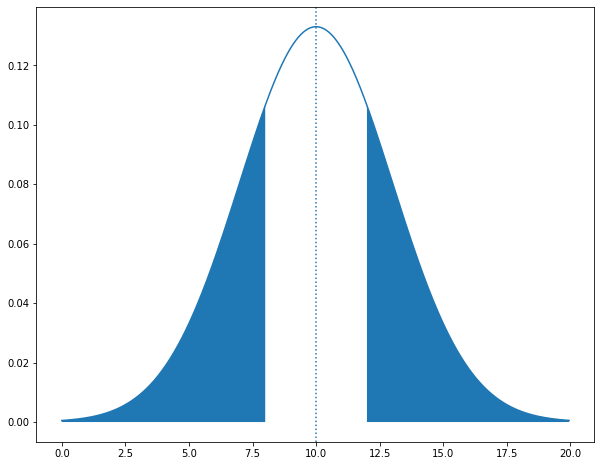

In [15]:
p = act.norm.pdf(malha, scale=3, loc=10)
plt.figure(figsize=(10, 8))
plt.plot(malha, p)
plt.axvline(x=10, ls=':')
plt.fill_between(malha, 0, p, where= p<=0.10648267)
plt.show()

**Distribuição Binomial**

Para esse tipo de distribuição, V.A simboliza um espaço $\Omega$ **discreto** de possibilidades. Como o lançar de um ou mais dados, moedas. Ou seja, eventos com possibilidades $ \in \mathbb{N}$

E o exemplo mais simples dessa distribuição é chamado **Distribuição de Bernoulli**. Para essa distribuição, $n = 1$. Ou seja, só **UMA** moeda é lançada, **UM** dado, **UMA** carta é sorteada e assim por diante. x pode ser *sucesso* ou *fracasso*, numericamente, x $\in \{0, 1\}$. E nesse evento único, a chance de sucesso é denominada $p$, e de fracasso $q = 1 - p$. Assim, podemos definir a **Probabilidade** como sendo

$$P(x) = p^xq^{1-x}$$

Agora, para falarmos de uma *Binomial*, temos que definir **Evento Independente**. Se eu jogar um dado, qual a chance de sair 5 em um dia ensolarado? E em um dia chuvoso? Percebe que, nesse caso, o evento *dado* e *atmosfera* não interferem um no outro? Se eu lançar duas moedas, o resultado da primeira influencia o da segunda? Para situações assim, falamos que são **Eventos Independentes**

$$P(X=x|Y=y) = P(X=x)P(Y=y)$$

Explicado esse conceito, uma distribuição **Binomial** une o visto em *Bernoulli* e *Evento Independente* e mais uma coisa: **Análise Combinatória**. Num experimento com vários eventos, uma mesma V.A pode possuir mais de uma possibilidade de ocorrência. Exemplo:

- Lançamento de 3 moedas, sendo *cara* o sucesso:

    $$X \in \{0, 1, 2, 3\}$$
    
    $$x \in \{(cara, cara, cara), (cara, cara, coroa), (cara, coroa, cara), (coroa, cara, cara, )(coroa, coroa, cara), (coroa, cara, coroa), (cara, coroa, coroa), (coroa, coroa, coroa)\}$$

Perceba que, para $P(X=1)$,  existem 3 maneiras diferentes para o evento *uma cara* ocorrer, tal qual para $P(X=2)$. Isso pois existe mais de uma **combinação** que satisfaz tais eventos. Como são eventos *independentes*, eu poderia escrever da seguinte maneira o evento X=1, para o lançamento de 3 moedas, sendo *cara* sucesso

$P(X=1) = P(X=1|X=0|X=0) + P(X=0|X=1|X=0) + P(X=0|X=0|X=1)$

$P(X=1) = P(X=1).P(X=0).P(X=0) + P(X=0).P(X=1).P(X=0) + P(X=0).P(X=0).P(X=1)$

$P(X=1) = p^1q^{1-1}.p^0q^{(1-0)}.p^0q^{(1-0)} + p^0q^{(1-0)}.p^1q^{(1-1)}.p^0q^{(1-0)} + p^0q^{(1-0)}.p^0q^{(1-0)}.p^1q^{(1-1)}$

ou

$$P(X=k) = C_{n, k}p^kq^{(n-k)} = \frac{n!}{k!(n-k)!}p^kq^{(n-k)}$$

Agora, se fosse *no máximo* uma cara?

$$P(X \leq 1) = P(X=1) + P(X=0)= P(X=1|X=0|X=0) + P(X=0|X=1|X=0) + P(X=0|X=0|X=1) + P(X=0|X=0|X=0)$$

Já deu pra ver que vai virar um monstrinho isso. Então, para lidar com as possíveis combinações, e somas delas, temos

$$P(X \leq k) = P(X = 0) + P(X = 1) + \dots + P(X = k) = \sum_{i=0}^{k} C(n, i) p^{i} (1 - p)^{n - i}$$

sendo $k \in \{0, 1, 2, \dots, n\}$ o **número de sucessos**, e $n \in \mathbb{N}$  **número de eventos**

Por fim, podemos calcular a **Esperança** e **Variância** de uma observação

$$\mathbb{E}(X)=np$$

$$\mathbb{V}(X)=npq$$

**Nota:** 
$$X = N(\mu, \sigma^2)$$

$$X = Bernoulli(p)$$

$$X = Binomial(n,p)$$

Para gerar uma distribuição *Binomial* aleatória

```python
scipy.stats.binom.rvs(n, p, size=int)
```

```python
scipy.stats.binom.métodos
```

**Métodos:**

- .cdf(): probabilidade acumulada P(X <= int)
- .sf(): probabilidade da *survival function* P(X > int)
- .ppf(): x *esquerdo* para F(x) = P(X=x) = probabilidade
- .isf(): x *direito* para F(x) = P(X=x) = probabilidade
- .pmf(): tipo norm.pdf(), é a função massa de probabilidade p(x) para x de F(x) = P(X=x)

**Nota:** Para esses métodos, os parâmetros são
```python
(quantidade de sucessos, n, p)
```

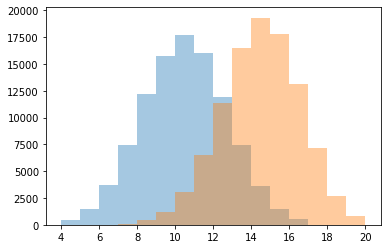

In [16]:
binom_20_05 = act.binom.rvs(20, .5, size=100000)  # E(X) = 20 x .5, Var(X) = 20 x .5 x .5
binom_20_07 = act.binom.rvs(20, .7, size=100000)
sns.distplot(binom_20_05, kde=False, bins=range(4, 18));
sns.distplot(binom_20_07, kde=False, bins=range(4, 21));

In [17]:
binom_20_05.mean(), binom_20_05.var(), binom_20_05.std()

(9.99426, 4.9980670524, 2.2356357154957065)

**Exemplo 1**

Qual a probabilidade de se obter, no máximo, 3 caras em 20 lançamentos? sendo a moeda viciada e a chance de sucesso é $p=0.1$

O que queremos

$$F(3)=P(X\leq3)=P(X=0)+P(X=1)+\dots+P(x=3)=\sum_{i=0}^{k=3}C_{20,3}p^i(1-p)^{20-i}$$

In [18]:
act.binom.cdf(3, 20, .1)

0.867046676565665

In [19]:
pmf_3_20 = list(act.binom.pmf(x, 20, .1) for x in range(4))
print(pmf_3_20)
sum(pmf_3_20)

[0.12157665459056925, 0.27017034353459823, 0.28517980706429813, 0.19011987137619865]


0.8670466765656644

In [20]:
ppf_3_20 = act.binom.ppf(pmf_3_20, 20, .1)
print(ppf_3_20)
isf_3_20 = act.binom.isf(pmf_3_20, 20, .1)
print(isf_3_20)

[0. 1. 1. 1.]
[4. 3. 3. 3.]


In [21]:
act.binom.sf(3, 20, .1)

0.1329533234343351

**Exemplo 3**

Qual a probabilidade de se obter, pelo menos, 10 sucessos em 20 lançamentos, com chance de sucesso $p=.1$

O que queremos

$$F(10)-F(20)=P(X\geq10)=P(X=10)+\dots+P(X=20)=\sum_{i=10}^{k=20}C_{20,i}p^i(1-p)^{20-i}$$

ou

$$1-F(9)=1-P(X\leq9)=1-(P(X=1)+\dots+P(X=9))=\sum_{i=0}^{k=9}C_{20,i}p^i(1-p)^{20-i}$$

In [22]:
act.binom.sf(9, 20, .1)  # P(X > 9) = P(X >= 10)

7.150904021083785e-06

In [23]:
1 - act.binom.cdf(9, 20, .1)

7.15090402103602e-06

In [24]:
pmf_10_more_20 = list(act.binom.pmf(x, 20, .1) for x in range(10, 21))
print(pmf_10_more_20)
sum(pmf_10_more_20)

[6.442043387911576e-06, 6.507114533243995e-07, 5.422595444369999e-08, 3.7077575688000126e-09, 2.0598653160000055e-10, 9.154956959999962e-12, 3.178804500000009e-13, 8.310600000000042e-15, 1.539000000000005e-16, 1.800000000000002e-18, 1.0000000000000063e-20]


7.150904021083797e-06

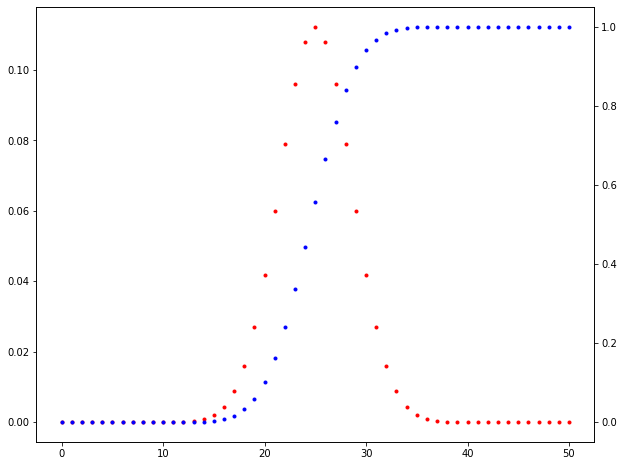

In [49]:
eventos = np.array(range(0, 51))
binomial = act.binom.pmf(eventos, 50, .5)
cumulativa_binomial = act.binom.cdf(eventos, 50, .5)
figure, g1 = plt.subplots(figsize=(10, 8))
g1.plot(eventos, binomial, '.r')
g2 = g1.twinx()
g2.plot(eventos, cumulativa_binomial, '.b')
plt.show()

No gráfico acima, foi possível perceber que as distribuições *normais* e *binomiais* se parecem um pouco. E a pergunta que fica é: existe uma condição para que elas sejam *iguais*?

**Condição para Aproximar $Binomial(n, p) \backsim N(\mu, \sigma^2)$**

$$n\geq20$$

Agora, vamos reescrever as variáveis independentes de $N(\mu, \sigma^2)$, mas de acordo com seus significados na distribuição binomial

$$\mu=\mathbb{E}(X)=np$$

$$\sigma^2=\mathbb{V}(X)=npq$$

Assim

$$Binomial(n, p)\backsim N(np,npq)$$

Devemos também considerar, para dar certo, $n\geq20$ e $p$ não muito próximo de 0 ou 1

**Exemplo 4**

Qual a probabilidade de se obter, pelo menos, 50 sucesso em 200 lançamentos de uma moeda viciada que tem probabilidade de sucesso $p=0.3$? sendo *cara* sucesso

O que queremos

$$P(X\geq50)=P(X=0)+P(X=1)+\dots+P(X=50)=1-P(X\leq49)=1-\sum_{i=0}^{k=49}C_{200,i}p^i(1-q)^{200-i}$$

*Binomial*

In [58]:
b = 1 - act.binom.cdf(49, 200, .3)
print(b)

0.9494082059701139


*Normal*

$\mu=np=200\times0.3=60$

$\sigma^2=npq=200\times0.3\times0.7=42$

In [59]:
n = 1 - act.norm.cdf(50, loc=60, scale=np.sqrt(42))
print(n)

0.9385886759493037


Repare que os valores deram muito próximos. Vamos ver o *Erro relativo*, sendo o resultado da distribuição binomial o correto

In [61]:
erro = 100 * abs(b-n)/b
print(f'{erro:.3f}%')

1.140%


Existe a possibilidade de corrigir tal discrepãncia. Mas será que vale a pena? eu digo isso pois a maneira de usar a *distribuição Binomial* ou *distribuição Normal*, com o pacote `scipy.stats`, é quase a mesma. Se soubermos bem os conceitos de cada distribuição, não teremos problema